# MC886 Assigment 1

## Objective:
Use linear regression model to predict the prices of diamonds given their atributes. The data set might be found on:
https://www.kaggle.com/shivam2503/diamonds.


In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
data_dir = '../data/diamonds.csv'

In [3]:
with open(data_dir, 'rb') as csvfile:
    dataset = pd.read_csv(data_dir)
    
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [4]:
#carat	cut	color	clarity	depth	table	price	x	y	z
# print(dataset['cut'])

## Preprocessing the data

### 1. Split data in training, validation and test
A wise person said: "friends don’t let friends use testing data for training".  Set bellow the sizes of each set.

**Note:**
* **sklearn.model_selection.train_test_split(*arrays, **options)**  
    Split arrays or matrices into random train and test subsets.  
    See documentation:http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### 2. Put the dataset into Numpy volume
Categorical atributes are changed to integers.

In [5]:
#1. SPLIT DATASET
data_size = 53940        #change values here
train_size = 30000
validation_size = 10000
test_size = 13940

nx = 9                   #number of features of the input
ny = 1                   #number of fetures of the output

train,test_validation = train_test_split(dataset, test_size = validation_size + test_size)
validation, test = train_test_split(test_validation, test_size = test_size)

print ("data_size: ", data_size)
print ("train_size: ", train.shape[0])
print ("validation_size: ", validation.shape[0])
print ("test_size: ", test.shape[0])


#2. SAVE THE PANDA'S DATAFRAME ON NUMPY ARRAYS
categorical_labels = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

train_volume = np.empty(train.shape)
validation_volume = np.empty(validation.shape)
test_volume = np.empty(test.shape)

le = LabelEncoder()

# For each feature, copy or transforms and copy (in categorical case) to the correspondent volume
for i in range(len(categorical_labels)):
    if( i >= 1 and i <= 3): #if the feature is categorical
        train_volume [:,i] = le.fit_transform(train[categorical_labels[i]])
        validation_volume[:, i] = le.fit_transform(validation[categorical_labels[i]])
        test_volume[:, i] = le.fit_transform(test[categorical_labels[i]])
    else:
        train_volume[:,i] = train[categorical_labels[i]]
        validation_volume[:,i] = validation[categorical_labels[i]]
        test_volume[:,i] = test[categorical_labels[i]]

# Separates the input from the label organize data in (number_features, number_of_examples)
x_train = (train_volume[:, 0:9]).T
y_train = (train_volume[:, 9].reshape(train_size,1)).T
x_validation = validation_volume [:, 0:9].T
y_validation = validation_volume [:,9].reshape(ny, validation_size)
x_test = test_volume [:,0:9].T
y_test = test_volume [:,9].reshape(test_size,1).T

# Sanity check
assert(x_train.shape == (nx, train_size))
assert(y_train.shape == (ny, train_size))
assert(x_validation.shape == (nx, validation_size))
assert(y_validation.shape == (ny, validation_size))
assert(x_test.shape == (nx, test_size))
assert(y_test.shape == (ny, test_size))

data_size:  53940
train_size:  30000
validation_size:  10000
test_size:  13940


In [25]:
def init_parameters(X):
    """
    Receives: the input vector shape (nx, m), where nx is the number of features and
    m the number of examples.
    Returns:
    W: the weight array shape ( 1, nx)
    dW: the derivative array shape ( 1, nx)
    b: a real number (bias)
    db: the derivative os the bias.
    """
    nx = X.shape[0]
    W = np.random.randn(1,nx)*0.01
    dw = np.random.randn(1,nx)*0.01
    b = 0.
    db = 0.
    return W,b, dw, db

In [7]:
def l2_cost(X, Y, Y_hat, m):
    """
    Cost function defined by a variation of the l2 norm function.
    The '2' in the denominator makes the deriative easier
    """
    cost = (1/(2*m))*np.sum((Y-Y_hat)**2)
    return cost

In [8]:
#FORWARD PROPAGATION (WELL THIS IS NOT A NN, BUT ...)
def forward_prop(X, w, b):
    """
    X is the input vector with m training examples, shape (1,m)
    w: is the angular coefficient
    b: is the linear coefficient
    """
    Y_hat = np.dot(w,X) + b
    return Y_hat

In [9]:
def backward_propagation(X,Y, Y_hat, m):
    """
    Calculates the derivatives of the parameters
    returns:
    dw
    db
    """
    dw = (-1./m)*np.sum((Y -Y_hat)*X)
    db = (-1./m)*np.sum((Y -Y_hat))
    return dw, db

In [28]:
def GD_model(X,Y, num_iterations = 100, learning_rate = 0.000000001):
    """
    Given X and Y estimates the best linear function to fit the data
    """
    m = X.shape[1]
    print('m = ', m) 
    
    w,b,dw,db = init_parameters(x_train)
    for iteration in range(num_iterations):
        
        #forward propagation (we can think the activation function as linear)
        Y_hat = forward_prop(X,w,b)
        
        #plot the cost function
        cost = l2_cost(X,Y, Y_hat,m)
        plt.plot(iteration,cost,'ro')
    
        #Backward propagation calculate the derivatives 
        dw, db = backward_propagation(X,Y,Y_hat, m)
    
        #Update parameters simultaneusly
        temp_w = w - learning_rate*dw
        temp_b = b - learning_rate*db
        w = temp_w
        b = temp_b
    plt.show()
    return w, b, cost

m =  30000


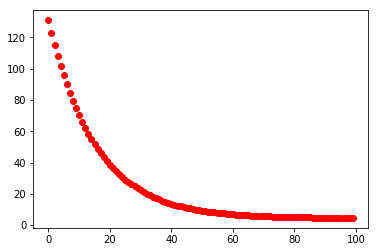

4.615220211109722
[[-0.01330354  0.01539587 -0.01114552 -0.00375111 -0.01497275 -0.00652485
   0.00078723  0.00246629  0.0216475 ]]
-1.3362044609325415e-07


In [29]:
w_gd, b_gd, cost_gd= GD_model(x_train,y_train)
print(cost_gd)
print(w_gd)
print(b_gd)

In [26]:
def SGD_model(X,Y, num_iterations = 20, learning_rate = 0.00000001):
    """
    Given X and Y estimates the best linear function to fit the data
    """
    m = X.shape[1]
    print('m = ', m)
    
    w,b,dw,db = init_parameters(x_train)
    for iteration in range(num_iterations):
        print("\riteração: ", iteration +1, end = "")
        for element in range(m):
            #forward propagation (we can think the activation function as linear)
            Y_hat = forward_prop(X[:,element],w,b)
            
            #Backward propagation calculate the derivatives 
            dw, db = backward_propagation(X[:,element],Y[:,element],Y_hat, m)
    
            #Update parameters simultaneusly
            temp_w = w - learning_rate*dw
            temp_b = b - learning_rate*db
            w = temp_w
            b = temp_b
        #plot the cost function
        cost = l2_cost(X,Y, Y_hat,m)
        plt.plot(iteration,cost,'ro')
    plt.show()
    return w, b, cost

m =  30000
iteração:  20

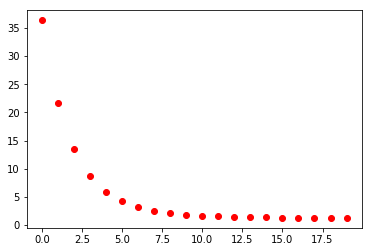

1.2619742326290626
[[ 0.00796306  0.00570123  0.00154751  0.00367115 -0.00545373 -0.02102895
   0.00072111  0.00714053 -0.00880845]]
6.829125966322074e-07


In [27]:
w_sgd, b_sgd, cost_sgd = SGD_model(x_train,y_train)
print(cost_sgd)
print(w_sgd)
print(b_sgd)

In [14]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
clf = linear_model.SGDRegressor(loss='squared_loss', penalty='l2', learning_rate = 'constant', eta0 = 0.00000001)
clf.fit(x_train.T, y_train.T)
# Make predictions using the testing set
y_hat = clf.predict(x_train.T)
# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_train.T, y_hat.T))
print("Error: %.2f"
      % l2_cost(x_train, y_train, y_hat, train_size))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train.T, y_hat.T))

# cost [element] = l2_cost(x_train, y_train, y_)
# plt.show()
# print(cost)

Coefficients: 
 [0.00022618 0.00098306 0.00113463 0.00132843 0.02532298 0.02329945
 0.00011245 0.00218166 0.00219019]
Mean squared error: 0.18
Error: 0.09
Variance score: 0.64


/home/ntkm/env/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ntkm/env/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Normal equation

In [30]:
X_norm = np.concatenate((x_train, x_validation), axis=1).T
x0_norm = np.ones((X_norm.shape[0], 1))
X_norm = np.concatenate((x0_norm, X_norm), axis=1)
y_norm = np.concatenate((y_train, y_validation), axis=1).T
n_features = X_norm.shape[1]
print('X:', X_norm.shape)
# compute Normal Eq.
XTX_inv = np.linalg.inv(np.matmul(X_norm.T, X_norm))
theta_norm = np.matmul(np.matmul(XTX_inv, X_norm.T), y_norm)
print('theta: ', theta_norm.shape)

X: (40000, 10)
theta:  (10, 1)


In [31]:
# Test
X_test_norm = np.concatenate((np.ones((x_test.shape[1], 1)), x_test.T), axis=1)
y_test_norm = y_test

print('test')
print('X test:', X_test_norm.shape)
print('y test:', y_test_norm.shape)
print('*' * 40)

max_diff = 0
for i in range(len(X_test_norm)):
    estimate = np.matmul(theta_norm.T, np.reshape(X_test_norm[i], (n_features, 1)))
    print('i: %d; estimado: %lf; real: %lf; diferenca: %lf' 
          %(i, estimate, y_test_norm[:,i], estimate-y_test_norm[:,i]))

test
X test: (13940, 10)
y test: (1, 13940)
****************************************
i: 0; estimado: 3.556889; real: 3.560000; diferenca: -0.003111
i: 1; estimado: 4.079654; real: 4.080000; diferenca: -0.000346
i: 2; estimado: 3.577473; real: 3.580000; diferenca: -0.002527
i: 3; estimado: 2.693540; real: 2.680000; diferenca: 0.013540
i: 4; estimado: 3.188341; real: 3.190000; diferenca: -0.001659
i: 5; estimado: 2.955850; real: 2.960000; diferenca: -0.004150
i: 6; estimado: 4.239461; real: 4.260000; diferenca: -0.020539
i: 7; estimado: 3.341595; real: 3.320000; diferenca: 0.021595
i: 8; estimado: 2.764386; real: 2.760000; diferenca: 0.004386
i: 9; estimado: 2.661105; real: 2.680000; diferenca: -0.018895
i: 10; estimado: 3.962952; real: 3.970000; diferenca: -0.007048
i: 11; estimado: 3.120427; real: 3.120000; diferenca: 0.000427
i: 12; estimado: 3.308726; real: 3.300000; diferenca: 0.008726
i: 13; estimado: 4.622515; real: 4.670000; diferenca: -0.047485
i: 14; estimado: 4.041601; real: 4

i: 1571; estimado: 4.594057; real: 4.620000; diferenca: -0.025943
i: 1572; estimado: 4.261431; real: 4.250000; diferenca: 0.011431
i: 1573; estimado: 4.133947; real: 4.140000; diferenca: -0.006053
i: 1574; estimado: 3.040380; real: 3.050000; diferenca: -0.009620
i: 1575; estimado: 2.903258; real: 2.900000; diferenca: 0.003258
i: 1576; estimado: 2.688899; real: 2.680000; diferenca: 0.008899
i: 1577; estimado: 2.772335; real: 2.750000; diferenca: 0.022335
i: 1578; estimado: 3.803643; real: 3.810000; diferenca: -0.006357
i: 1579; estimado: 4.169308; real: 4.190000; diferenca: -0.020692
i: 1580; estimado: 3.944988; real: 3.930000; diferenca: 0.014988
i: 1581; estimado: 4.086786; real: 4.080000; diferenca: 0.006786
i: 1582; estimado: 3.661819; real: 3.660000; diferenca: 0.001819
i: 1583; estimado: 3.303947; real: 3.320000; diferenca: -0.016053
i: 1584; estimado: 3.768071; real: 3.770000; diferenca: -0.001929
i: 1585; estimado: 3.984774; real: 4.010000; diferenca: -0.025226
i: 1586; estimado

i: 3071; estimado: 4.532148; real: 4.480000; diferenca: 0.052148
i: 3072; estimado: 3.946439; real: 3.960000; diferenca: -0.013561
i: 3073; estimado: 2.631648; real: 2.670000; diferenca: -0.038352
i: 3074; estimado: 3.156673; real: 3.160000; diferenca: -0.003327
i: 3075; estimado: 3.995335; real: 3.970000; diferenca: 0.025335
i: 3076; estimado: 3.106894; real: 3.100000; diferenca: 0.006894
i: 3077; estimado: 4.184467; real: 4.190000; diferenca: -0.005533
i: 3078; estimado: 4.261974; real: 4.250000; diferenca: 0.011974
i: 3079; estimado: 3.133792; real: 3.150000; diferenca: -0.016208
i: 3080; estimado: 3.206975; real: 3.190000; diferenca: 0.016975
i: 3081; estimado: 4.011652; real: 4.030000; diferenca: -0.018348
i: 3082; estimado: 4.017917; real: 4.020000; diferenca: -0.002083
i: 3083; estimado: 2.551712; real: 2.510000; diferenca: 0.041712
i: 3084; estimado: 4.576595; real: 4.570000; diferenca: 0.006595
i: 3085; estimado: 3.870261; real: 3.860000; diferenca: 0.010261
i: 3086; estimado:

i: 4570; estimado: 4.118352; real: 4.130000; diferenca: -0.011648
i: 4571; estimado: 4.126216; real: 4.150000; diferenca: -0.023784
i: 4572; estimado: 2.878013; real: 2.880000; diferenca: -0.001987
i: 4573; estimado: 2.627222; real: 2.650000; diferenca: -0.022778
i: 4574; estimado: 2.673889; real: 2.650000; diferenca: 0.023889
i: 4575; estimado: 4.023947; real: 4.020000; diferenca: 0.003947
i: 4576; estimado: 2.959331; real: 2.940000; diferenca: 0.019331
i: 4577; estimado: 4.983888; real: 4.960000; diferenca: 0.023888
i: 4578; estimado: 2.727685; real: 2.730000; diferenca: -0.002315
i: 4579; estimado: 3.999792; real: 3.970000; diferenca: 0.029792
i: 4580; estimado: 2.846118; real: 2.840000; diferenca: 0.006118
i: 4581; estimado: 4.557328; real: 4.550000; diferenca: 0.007328
i: 4582; estimado: 2.711605; real: 2.700000; diferenca: 0.011605
i: 4583; estimado: 3.668462; real: 3.670000; diferenca: -0.001538
i: 4584; estimado: 2.562658; real: 2.590000; diferenca: -0.027342
i: 4585; estimado:

i: 6570; estimado: 2.906577; real: 2.880000; diferenca: 0.026577
i: 6571; estimado: 3.991430; real: 4.000000; diferenca: -0.008570
i: 6572; estimado: 3.429544; real: 3.420000; diferenca: 0.009544
i: 6573; estimado: 2.792236; real: 2.750000; diferenca: 0.042236
i: 6574; estimado: 3.843268; real: 3.840000; diferenca: 0.003268
i: 6575; estimado: 4.607978; real: 4.610000; diferenca: -0.002022
i: 6576; estimado: 3.452896; real: 3.420000; diferenca: 0.032896
i: 6577; estimado: 3.586677; real: 3.590000; diferenca: -0.003323
i: 6578; estimado: 3.170958; real: 3.180000; diferenca: -0.009042
i: 6579; estimado: 2.851634; real: 2.840000; diferenca: 0.011634
i: 6580; estimado: 4.113055; real: 4.110000; diferenca: 0.003055
i: 6581; estimado: 3.089870; real: 3.100000; diferenca: -0.010130
i: 6582; estimado: 4.007842; real: 3.980000; diferenca: 0.027842
i: 6583; estimado: 3.587621; real: 3.570000; diferenca: 0.017621
i: 6584; estimado: 2.901089; real: 2.880000; diferenca: 0.021089
i: 6585; estimado: 3

i: 8069; estimado: 3.950925; real: 3.960000; diferenca: -0.009075
i: 8070; estimado: 3.697362; real: 3.680000; diferenca: 0.017362
i: 8071; estimado: 2.909827; real: 2.930000; diferenca: -0.020173
i: 8072; estimado: 3.523936; real: 3.530000; diferenca: -0.006064
i: 8073; estimado: 2.920508; real: 2.930000; diferenca: -0.009492
i: 8074; estimado: 2.967084; real: 2.970000; diferenca: -0.002916
i: 8075; estimado: 4.459713; real: 4.410000; diferenca: 0.049713
i: 8076; estimado: 4.036286; real: 4.040000; diferenca: -0.003714
i: 8077; estimado: 3.953903; real: 3.980000; diferenca: -0.026097
i: 8078; estimado: 4.290843; real: 4.310000; diferenca: -0.019157
i: 8079; estimado: 2.764055; real: 2.750000; diferenca: 0.014055
i: 8080; estimado: 3.493382; real: 3.480000; diferenca: 0.013382
i: 8081; estimado: 3.877897; real: 3.870000; diferenca: 0.007897
i: 8082; estimado: 2.294106; real: 2.350000; diferenca: -0.055894
i: 8083; estimado: 4.219950; real: 4.210000; diferenca: 0.009950
i: 8084; estimad

i: 10069; estimado: 2.687603; real: 2.710000; diferenca: -0.022397
i: 10070; estimado: 4.234184; real: 4.240000; diferenca: -0.005816
i: 10071; estimado: 4.069550; real: 4.060000; diferenca: 0.009550
i: 10072; estimado: 4.620824; real: 4.630000; diferenca: -0.009176
i: 10073; estimado: 2.911742; real: 2.890000; diferenca: 0.021742
i: 10074; estimado: 3.879539; real: 3.890000; diferenca: -0.010461
i: 10075; estimado: 2.782025; real: 2.780000; diferenca: 0.002025
i: 10076; estimado: 3.848364; real: 3.840000; diferenca: 0.008364
i: 10077; estimado: 3.642881; real: 3.660000; diferenca: -0.017119
i: 10078; estimado: 3.214785; real: 3.230000; diferenca: -0.015215
i: 10079; estimado: 2.764824; real: 2.740000; diferenca: 0.024824
i: 10080; estimado: 3.863063; real: 3.850000; diferenca: 0.013063
i: 10081; estimado: 3.201507; real: 3.190000; diferenca: 0.011507
i: 10082; estimado: 3.629892; real: 3.620000; diferenca: 0.009892
i: 10083; estimado: 2.728862; real: 2.700000; diferenca: 0.028862
i: 1

i: 11569; estimado: 3.395292; real: 3.390000; diferenca: 0.005292
i: 11570; estimado: 3.905329; real: 3.920000; diferenca: -0.014671
i: 11571; estimado: 4.849739; real: 4.830000; diferenca: 0.019739
i: 11572; estimado: 2.972670; real: 2.960000; diferenca: 0.012670
i: 11573; estimado: 3.281890; real: 3.280000; diferenca: 0.001890
i: 11574; estimado: 3.618626; real: 3.610000; diferenca: 0.008626
i: 11575; estimado: 3.551177; real: 3.570000; diferenca: -0.018823
i: 11576; estimado: 3.013425; real: 3.010000; diferenca: 0.003425
i: 11577; estimado: 2.939568; real: 2.950000; diferenca: -0.010432
i: 11578; estimado: 4.263403; real: 4.260000; diferenca: 0.003403
i: 11579; estimado: 3.745908; real: 3.750000; diferenca: -0.004092
i: 11580; estimado: 5.077127; real: 5.070000; diferenca: 0.007127
i: 11581; estimado: 2.702249; real: 2.720000; diferenca: -0.017751
i: 11582; estimado: 4.557282; real: 4.560000; diferenca: -0.002718
i: 11583; estimado: 3.604952; real: 3.610000; diferenca: -0.005048
i: 

i: 12827; estimado: 3.303747; real: 3.310000; diferenca: -0.006253
i: 12828; estimado: 3.147092; real: 3.140000; diferenca: 0.007092
i: 12829; estimado: 2.565741; real: 2.600000; diferenca: -0.034259
i: 12830; estimado: 3.499983; real: 3.500000; diferenca: -0.000017
i: 12831; estimado: 3.626425; real: 3.610000; diferenca: 0.016425
i: 12832; estimado: 3.981909; real: 4.000000; diferenca: -0.018091
i: 12833; estimado: 3.878706; real: 3.870000; diferenca: 0.008706
i: 12834; estimado: 4.097420; real: 4.100000; diferenca: -0.002580
i: 12835; estimado: 3.746357; real: 3.750000; diferenca: -0.003643
i: 12836; estimado: 2.893449; real: 2.900000; diferenca: -0.006551
i: 12837; estimado: 2.752784; real: 2.710000; diferenca: 0.042784
i: 12838; estimado: 3.587872; real: 3.590000; diferenca: -0.002128
i: 12839; estimado: 3.561608; real: 3.590000; diferenca: -0.028392
i: 12840; estimado: 4.143606; real: 4.190000; diferenca: -0.046394
i: 12841; estimado: 2.827635; real: 2.820000; diferenca: 0.007635
